Train: X=(60000, 28, 28), y =(60000,)
Test: X=(10000, 28, 28), y =(10000,)


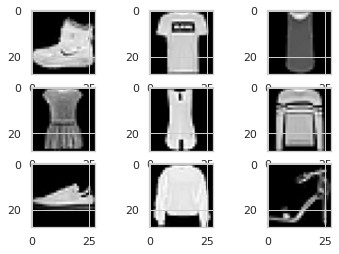

In [10]:
#preview dataset

from matplotlib import pyplot
from keras.datasets import fashion_mnist
from PIL import Image
import numpy
#load dataset
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

# summarize loaded dataset

print('Train: X=%s, y =%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y =%s' % (testX.shape, testy.shape))

# plot first few images

for i in range(9):
  #define subplot
  pyplot.subplot(330 + 1 + i)
  #plot raw pixel data
  pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
  
pyplot.show()

(unique, counts) = numpy.unique(testy, return_counts=True)
frequencies = numpy.asarray((unique, counts)).T

In [11]:
import pandas as pd 

df = pd.DataFrame(frequencies, columns=['label', 'count'])
df

,label,count
0,0,1000
1,1,1000
2,2,1000
3,3,1000
4,4,1000
5,5,1000
6,6,1000
7,7,1000
8,8,1000
9,9,1000


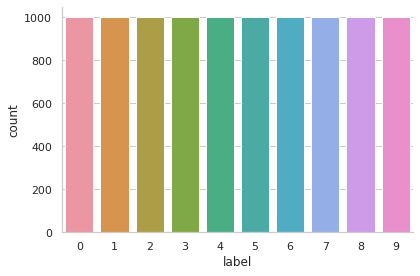

In [12]:
import seaborn as sns
# import matplotlib
# from matplotlib import pyplot as plt

sns.set(context="notebook", palette="Accent", style = 'whitegrid' , color_codes=True)
sns.catplot(x='label', y='count', data=df, height=4, kind='bar', aspect=1.5)

In [13]:
from keras.datasets import fashion_mnist
import matplotlib
matplotlib.use("Agg")
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.utils.vis_utils import plot_model

In [14]:
# load dataset
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

In [15]:
# preprocessing
trainX = trainX.astype('float')/255.0
testX = testX.astype('float')/255.0

# convert the label
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

labelNames = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [16]:
# model
class MiniVGGNet:
    @staticmethod
    def build(width, height, depth, classes):
        model = Sequential()

        inputShape = (height, width, depth)
        channelDimension = -1

        #if using channels first format, update the input shape
        if K.image_data_format() == 'channel_first':
            inputShape = (depth, height, width)
            channelDimension = 1

        model.add(Conv2D(32, (3, 3), padding='same', input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=channelDimension))
        model.add(Conv2D(32, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=channelDimension))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))

        #second layer block to miniVGG
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=channelDimension))
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=channelDimension))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))

        #FC -> RELU layers
        model.add(Flatten())
        model.add(Dense(512))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        return model


In [17]:
# init model
optimization = SGD(learning_rate=0.01, decay=0.01 / 40, momentum=0.9, nesterov=True)
model = MiniVGGNet.build(width=28, height=28, depth=1, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=optimization, metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 activation_6 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 batch_normalization_5 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 batch_normalization_6 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                      

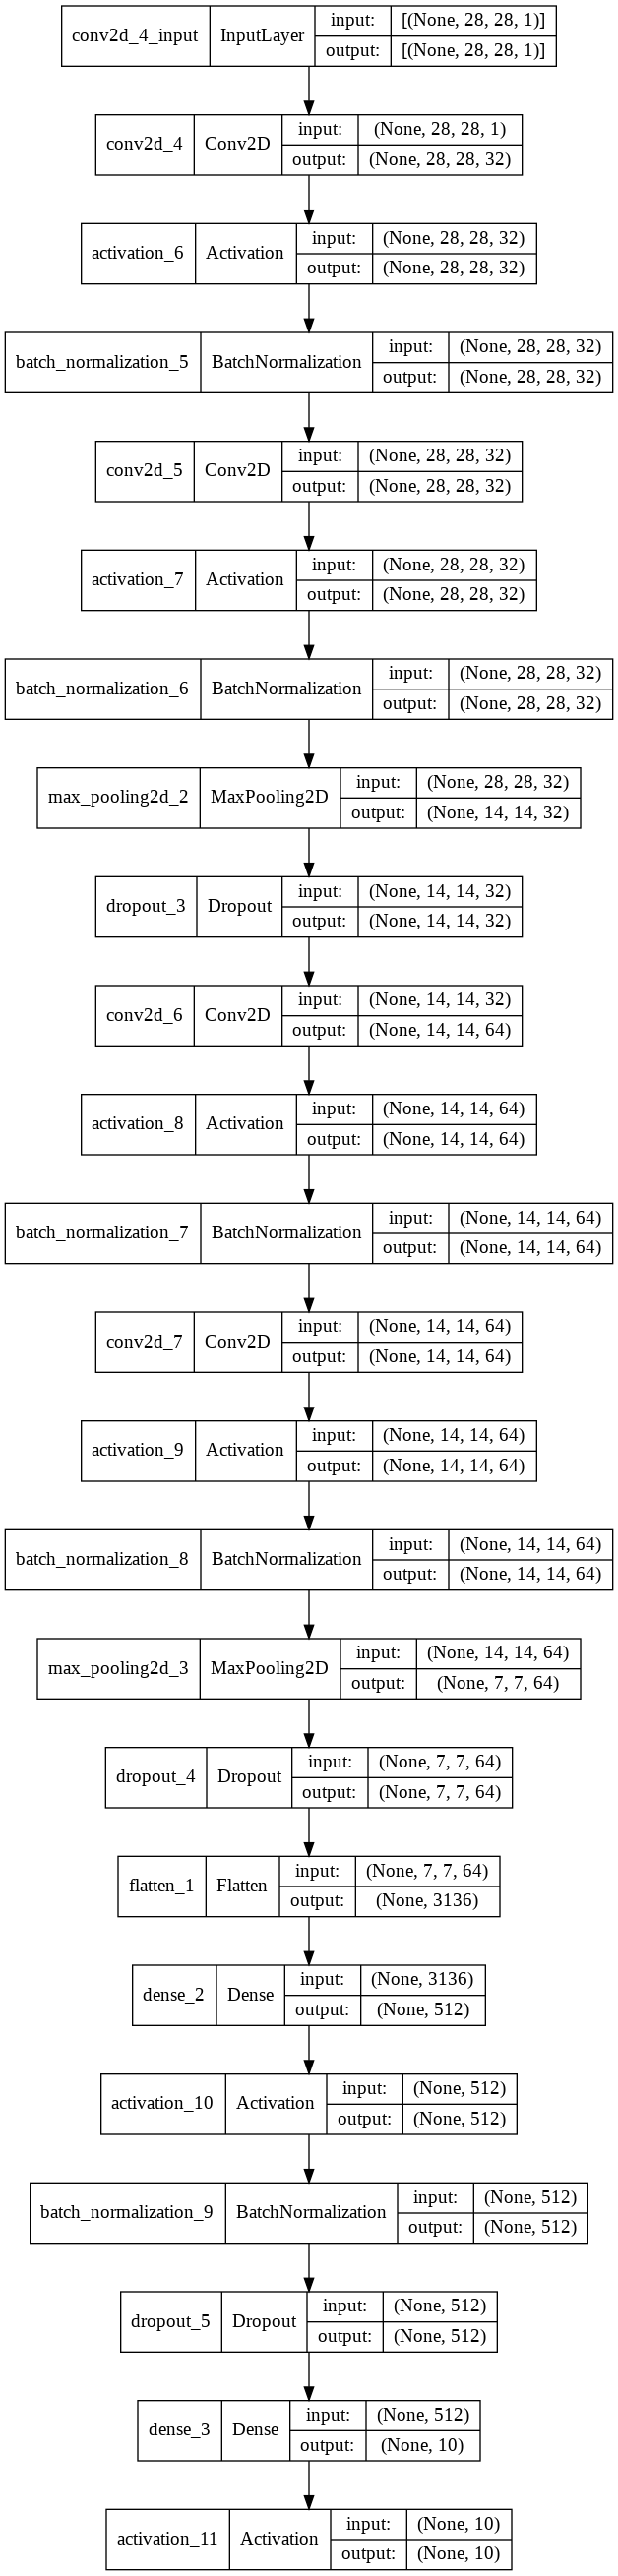

In [18]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [19]:
# training
history = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=64, epochs=40, verbose=2)

Epoch 1/40
938/938 - 26s - loss: 0.4964 - accuracy: 0.8268 - val_loss: 0.4050 - val_accuracy: 0.8504 - 26s/epoch - 28ms/step
Epoch 2/40
938/938 - 17s - loss: 0.3351 - accuracy: 0.8789 - val_loss: 0.3045 - val_accuracy: 0.8901 - 17s/epoch - 18ms/step
Epoch 3/40
938/938 - 17s - loss: 0.2920 - accuracy: 0.8943 - val_loss: 0.2663 - val_accuracy: 0.8997 - 17s/epoch - 18ms/step
Epoch 4/40
938/938 - 17s - loss: 0.2648 - accuracy: 0.9048 - val_loss: 0.2635 - val_accuracy: 0.9091 - 17s/epoch - 18ms/step
Epoch 5/40
938/938 - 17s - loss: 0.2457 - accuracy: 0.9104 - val_loss: 0.2576 - val_accuracy: 0.9034 - 17s/epoch - 18ms/step
Epoch 6/40
938/938 - 17s - loss: 0.2346 - accuracy: 0.9152 - val_loss: 0.2529 - val_accuracy: 0.9050 - 17s/epoch - 18ms/step
Epoch 7/40
938/938 - 17s - loss: 0.2220 - accuracy: 0.9193 - val_loss: 0.2112 - val_accuracy: 0.9235 - 17s/epoch - 18ms/step
Epoch 8/40
938/938 - 17s - loss: 0.2119 - accuracy: 0.9222 - val_loss: 0.2183 - val_accuracy: 0.9198 - 17s/epoch - 18ms/step


In [20]:
# testing
predictions = model.predict(testX, batch_size=64)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

              precision    recall  f1-score   support

 T-shirt/Top       0.89      0.90      0.90      1000
     Trouser       1.00      0.99      0.99      1000
    Pullover       0.92      0.91      0.91      1000
       Dress       0.94      0.94      0.94      1000
        Coat       0.89      0.92      0.91      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.83      0.79      0.81      1000
     Sneaker       0.97      0.98      0.98      1000
         Bag       0.99      0.99      0.99      1000
  Ankle Boot       0.98      0.97      0.97      1000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



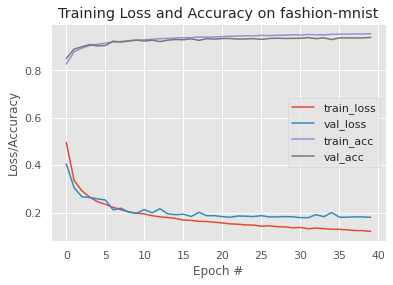

In [21]:
# visualize
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 40), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 40), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 40), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 40), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on fashion-mnist")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()